In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

data = pd.read_csv('Seasons_Stats.csv')

data = data[data['Year'] >= 2000]
data.fillna(0, inplace=True)
#print(data.info())


In [205]:
def get_team_data(team, year):
    team_data = data[data.Tm == team]
    team_data = team_data[data.Year == year]
    return team_data
warnings.filterwarnings('ignore')
#This function gives a warning about python series being reindexed

In [206]:
def total_points(team_name):
    years_arr = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
    playerScores = []
    team_scores = []
    for i in np.arange(len(years_arr)):
        t_data = get_team_data(team_name, years_arr[i])
        for index, row in t_data.iterrows():
            playerScores.append(row['PTS'])
        total_scores = np.sum(playerScores)
        team_scores.append(total_scores)
        myDataframe = pd.DataFrame()
    myDataframe['Years'] = years_arr
    myDataframe['scores'] = team_scores
    myDataframe['team'] = team_name
    return myDataframe

In [207]:
def visualize_total_points():
    lak = total_points('LAL')
    cleveland = total_points('CLE')
    okc = total_points('OKC')
    gsw = total_points('GSW')
    bos = total_points('BOS')
    mia = total_points('MIA')
    frames = [lak, cleveland, okc, gsw, bos, mia]
    result = pd.concat(frames)

    sns.lineplot(x='Years', y='scores',hue='team', data=result)
    plt.title('Total points scored by teams')
    plt.show()


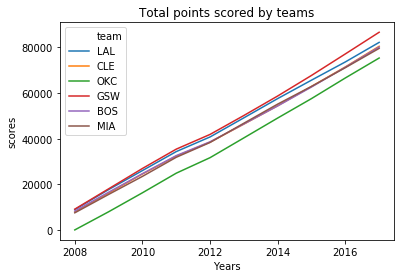

In [208]:
visualize_total_points()

In [209]:
def player_efficiency(team_name):
    years_arr = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
    PER = []
    total_per = []
    for i in np.arange(len(years_arr)):
        t_data = get_team_data(team_name, years_arr[i])
        t_data['PER'].fillna(0)

        for index, row in t_data.iterrows():
            PER.append(row['PER'])
        per_sum = np.sum(PER)
        total_per.append(per_sum)
    myDataframe = pd.DataFrame()
    myDataframe['Years'] = years_arr
    myDataframe['PER'] = total_per
    myDataframe['team'] = team_name
    return myDataframe

In [210]:
def visualize_total_per():
    lak = player_efficiency('LAL')
    cleveland = player_efficiency('CLE')
    okc = player_efficiency('OKC')
    gsw = player_efficiency('GSW')
    bos = player_efficiency('BOS')
    mia = player_efficiency('MIA')
    frames = [lak, cleveland, okc, gsw, bos, mia]

    result = pd.concat(frames)

    sns.lineplot(x='Years', y='PER',hue='team', data=result)
    plt.title('Total Player Efficiencies by Team')
    plt.show()


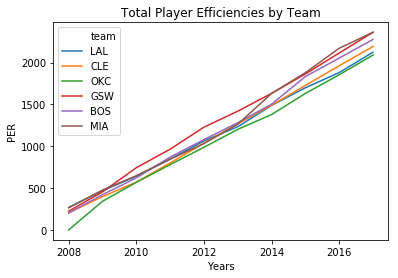

In [211]:
visualize_total_per()

In [212]:
def get_player_defensive_rating(player, year):
    player_data = data[data.Player == player]
    player_data = player_data[data.Year == year]
    #DRB% - Defensive Rebound Percentage    #DRB - Defensive Rebounds
    #STL% - Steal Percentage                #STL - Steals
    #BLK% - Block Percentage                #BLK - Blocks
    #DWS - Defensive Win Shares             #DBPM - Defensive Box Plus/Minus
    #blocks = 50%    steals = 30%   rebounds = 20%
    steals = player_data['STL'].values
    blocks = player_data['BLK'].values
    drb = player_data['DRB'].values
    
    defense_score = blocks*(1.5) + steals*(1.3) + drb*(1.2)
    return defense_score

In [213]:
def visualize_defense(player, year):
    player_data = data[data.Player == player]
    player_data = player_data[data.Year == year]
    labels = ['Steals', 'Blocks', 'Defensive Rebounds']
    steals = player_data['STL'].values
    blocks = player_data['BLK'].values
    drb = player_data['DRB'].values
    values = [steals, blocks, drb]
    colors = ['lightskyblue', 'lightcoral', 'yellowgreen']
    plt.pie(values, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
    plt.title(player + ' Defense Breakdown')
    plt.axis('equal')
    plt.show()

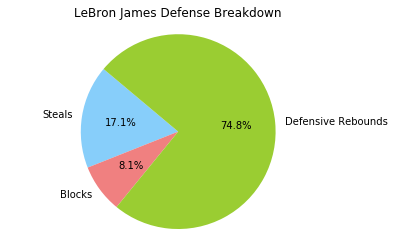

In [214]:
visualize_defense('LeBron James', 2016)

In [215]:
def team_defensive_trend(player_list = [], *args):
    player_df = []
    years_df = []
    scores_df = []
    years_arr = [2013, 2014, 2015, 2016]
    for year in years_arr:
        for player in player_list:
            score = get_player_defensive_rating(player, year)
            player_df.append(player)
            years_df.append(year)
            float_score = float(score)
            scores_df.append(round(float_score, 1))


    myDataframe = pd.DataFrame()
    myDataframe['years'] = years_df
    myDataframe['scores'] = scores_df
    myDataframe['players'] = player_df
    sns.lineplot(x='years', y='scores',hue='players',style='players', markers=True, dashes=False, data=myDataframe)
    plt.title('Player Defensive Trend')
    plt.show()

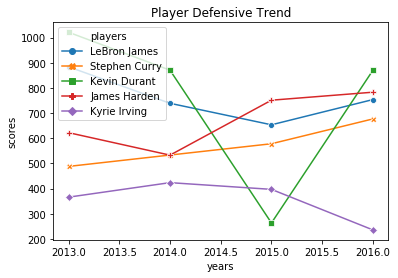

In [216]:
team_defensive_trend(['LeBron James', 'Stephen Curry', 'Kevin Durant', 'James Harden','Kyrie Irving'])

In [217]:
def offensive_player_rating(player, year):
    player_data = data[data.Player == player]
    player_data = player_data[data.Year == year]

    #TS% - True shooting %             ORB% - Offensive robound percentage
    #AST% - Assist percentage          FG - Field Goals
    #3P - 3 point field goals          2P - 2 point field Goals
    #FT - free throws                  ORB - offensive Rebounds
    #PTS - points                      TOV - Turnovers
    #AST - assists

    #3 point FG = 30%                   #Assists = 15%
    #2 point FG = 20%                   #Free throws = 15%
    #offensive rebounds = 10%           #turnovers = -10%
    three_pointers = player_data['3P'].values
    two_pointers = player_data['2P'].values
    offensive_rebounds = player_data['ORB'].values
    assists = player_data['AST'].values
    free_throws = player_data['FT'].values
    turnovers = player_data['TOV'].values

    offensive_score = three_pointers*(1.3) + two_pointers*(1.2) + offensive_rebounds*(1.1) + assists*(1.5) +free_throws*(1.5) - turnovers*(1.0)

    return offensive_score

In [218]:
def team_offensive_trend(player_list = [], *args):
    player_df = []
    years_df = []
    scores_df = []
    years_arr = [2013, 2014, 2015, 2016]
    for year in years_arr:
        for player in player_list:
            score = offensive_player_rating(player, year)
            player_df.append(player)
            years_df.append(year)
            float_score = float(score)
            scores_df.append(round(float_score, 1))


    myDataframe = pd.DataFrame()
    myDataframe['years'] = years_df
    myDataframe['scores'] = scores_df
    myDataframe['players'] = player_df
    sns.lineplot(x='years', y='scores',hue='players',style='players', markers=True, dashes=False, data=myDataframe)
    plt.title('Player Offensive Trend')
    plt.show()

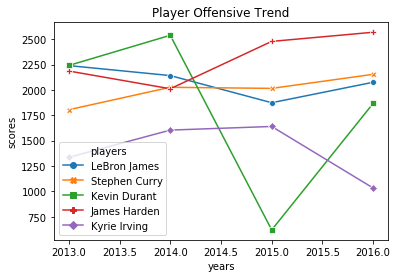

In [219]:
team_offensive_trend(['LeBron James', 'Stephen Curry', 'Kevin Durant', 'James Harden','Kyrie Irving'])

In [220]:
def age_score_trend(player_list = [], *args):
    frames = []
    for player in player_list:
        player_slice = data[data.Player == player]
        selected_cols = player_slice[['Player', 'Age', 'PTS']]
        frames.append(selected_cols)
    age_scores_df = pd.concat(frames)
    sns.lineplot(x='Age', y='PTS',hue='Player',style='Player', markers=True, dashes=False, data=age_scores_df)
    plt.title('Age vs Points plot')
    plt.show()

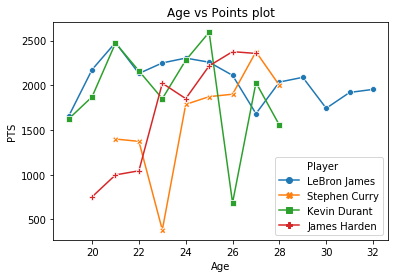

In [221]:
age_score_trend(['LeBron James', 'Stephen Curry', 'Kevin Durant', 'James Harden'])
